In [2]:
# Adapted from "Python Machine Learning Tutorial" by Tech with Tim
# This code predicts the overall rating of a player in Fifa based on his individual stats using Linear regression
# This is for practice purposes only, indeed we will see that the accuracy with this linear assumption is not very high.

In [3]:
import pandas as pd

In [4]:
import numpy as np
import sqlite3
cnx = sqlite3.connect('database.sqlite')
data = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [7]:
import matplotlib.pyplot as pyplot
import pickle 
from matplotlib import style 
from scipy.stats import gaussian_kde

In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install scikit-learn


                                              0.0/8.3 MB ? eta -:--:--
                                              0.2/8.3 MB 5.1 MB/s eta 0:00:02
     ---                                      0.6/8.3 MB 8.0 MB/s eta 0:00:01
     -----                                    1.2/8.3 MB 9.3 MB/s eta 0:00:01
     --------                                 1.8/8.3 MB 10.5 MB/s eta 0:00:01
     ------------                             2.5/8.3 MB 11.4 MB/s eta 0:00:01
     ---------------                          3.3/8.3 MB 12.4 MB/s eta 0:00:01
     --------------------                     4.2/8.3 MB 13.2 MB/s eta 0:00:01
     ------------------------                 5.1/8.3 MB 14.1 MB/s eta 0:00:01
     -----------------------------            6.2/8.3 MB 15.1 MB/s eta 0:00:01
     ------------------------------------     7.5/8.3 MB 16.6 MB/s eta 0:00:01
     ---------------------------------------  8.3/8.3 MB 17.1 MB/s eta 0:00:01
     ---------------------------------------- 8.3/8.3 MB 16.1 

In [11]:
import sklearn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#See the name of the columns
data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [14]:
print(data.head())

   id  player_fifa_api_id  player_api_id                 date  overall_rating   
0   1              218353         505942  2016-02-18 00:00:00            67.0  \
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing   
0       71.0          right              medium              medium      49.0  \
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

In [15]:
#keeping only the columns I'm interested in
data = data[["overall_rating", "crossing", "finishing","finishing", "short_passing", "volleys",
             "dribbling", "curve", "free_kick_accuracy","long_passing",
             "ball_control", "acceleration", "sprint_speed",
                "agility", "reactions", "balance", "shot_power", "jumping", "stamina",
               "strength", "long_shots"]]

In [16]:
print(data.head())

   overall_rating  crossing  finishing  finishing  short_passing  volleys   
0            67.0      49.0       44.0       44.0           61.0     44.0  \
1            67.0      49.0       44.0       44.0           61.0     44.0   
2            62.0      49.0       44.0       44.0           61.0     44.0   
3            61.0      48.0       43.0       43.0           60.0     43.0   
4            61.0      48.0       43.0       43.0           60.0     43.0   

   dribbling  curve  free_kick_accuracy  long_passing  ...  acceleration   
0       51.0   45.0                39.0          64.0  ...          60.0  \
1       51.0   45.0                39.0          64.0  ...          60.0   
2       51.0   45.0                39.0          64.0  ...          60.0   
3       50.0   44.0                38.0          63.0  ...          60.0   
4       50.0   44.0                38.0          63.0  ...          60.0   

   sprint_speed  agility  reactions  balance  shot_power  jumping  stamina   
0 

In [17]:
data

,overall_rating,crossing,finishing,finishing,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots
0,67.0,49.0,44.0,44.0,61.0,44.0,51.0,45.0,39.0,64.0,...,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0
1,67.0,49.0,44.0,44.0,61.0,44.0,51.0,45.0,39.0,64.0,...,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0
2,62.0,49.0,44.0,44.0,61.0,44.0,51.0,45.0,39.0,64.0,...,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0
3,61.0,48.0,43.0,43.0,60.0,43.0,50.0,44.0,38.0,63.0,...,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0
4,61.0,48.0,43.0,43.0,60.0,43.0,50.0,44.0,38.0,63.0,...,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,84.0,77.0,77.0,89.0,77.0,84.0,86.0,78.0,84.0,...,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0
183974,78.0,74.0,76.0,76.0,84.0,77.0,85.0,86.0,74.0,73.0,...,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0
183975,77.0,74.0,71.0,71.0,84.0,77.0,85.0,86.0,74.0,73.0,...,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0
183976,78.0,74.0,64.0,64.0,86.0,77.0,87.0,86.0,73.0,73.0,...,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0


In [18]:
# Some players have missing data, we therefore replace NaN with zeros for the code to run
data=data.fillna(0)

In [19]:
#label we want to predict
predict = "overall_rating"

In [28]:
# The 1 is here to say we want to drop a column and not a row
X=np.array(data.drop([predict],axis=1))

In [29]:
Y=np.array(data[predict])

In [30]:
# Splitting data into training set and testing set, splitting size being 80%/20%
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2)

In [31]:
# linear.fit finds the best fit for the data
# acc is the accuracy, here for a linear regression represented by R^2 (least squares regression)

#We train the model 30 times and save the model everytime the accuracy has improved.
#This loop can be removed for later use, as the best model is now saved in the pickle file.

best=0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.1)
    linear = LinearRegression()
    linear.fit(x_train, y_train)
    acc= linear.score(x_test, y_test)
    print(acc)
    
    if acc > best:
        best=acc
        with open("soccer.pickle", "wb") as f:
            pickle.dump(linear,f)
            
# creates and saves a file called soccer

0.7342762030790972
0.7341119973277512
0.7383478101282235
0.722560898819407
0.7279571978064032
0.7307065718941812
0.7309211772936127
0.7291610558672073
0.7328745250298154
0.7235527435979888
0.7247365186850094
0.7338775180505235
0.7354643252389674
0.7295005203143694
0.730034707988336
0.7403704431411329
0.7305845039186086
0.7218769876453894
0.7367745056756185
0.7300568236384148
0.723452021652901
0.7263546320511501
0.7196680796090941
0.7206482204862585
0.7257351704377177
0.7395372331105665
0.7294986488276621
0.7311163764169835
0.733827902966802
0.7208829828992005


In [32]:
#Loads the last saved file in linear
pickle_in = open("soccer.pickle", "rb")
linear = pickle.load(pickle_in)

In [33]:
# Coefficients of the fit
print('Coefficient: \n', linear.coef_)


Coefficient: 
 [-2.05456417e-02  1.38254514e+11 -1.38254514e+11 -1.64056182e-02
 -1.50098286e-02 -2.96572641e-02 -1.24522125e-02  1.28970772e-02
  1.03817680e-01  5.67945056e-02  4.81535446e-02  2.64826556e-02
  1.74754237e-02  5.25622591e-01 -4.10380742e-03  8.34995152e-03
  4.32529149e-02 -6.66694641e-02  1.30460858e-01 -1.07002258e-02]


In [34]:
#Intercept of the fit
print('Intercept: \n', linear.intercept_)


Intercept: 
 14.578271934611436


In [35]:
predictions= linear.predict(x_test)

In [36]:
# Shows 20 predictions of the test set. 
# If we want to see them all replace '20' with 'len(predictions)' but too many of them for this data set.
# prints the predicted value, the input values, and finally the actual value 
for x in range(20):
    print(predictions[x], x_test[x], y_test[x])
    
# We already knew the model isn't great because the accuracy was always around 0.73 (could slightly improve it by rounding off)
# Linear regression is therefore not a very accurate model as we can see on a few examples

64.88491255961144 [69. 60. 60. 69. 63. 71. 50. 57. 65. 67. 71. 73. 83. 59. 77. 72. 57. 53.
 57. 71.] 66.0
74.69741255961144 [78. 68. 68. 84. 78. 77. 74. 80. 80. 82. 69. 72. 74. 71. 78. 84. 72. 73.
 78. 84.] 76.0
65.15053755961144 [48. 64. 64. 47. 52. 75. 69. 38. 36. 69. 91. 93. 92. 68. 91. 70. 69. 68.
 33. 70.] 67.0
66.83901412211144 [49. 37. 37. 63. 35. 57. 48. 66. 68. 63. 64. 66. 62. 62. 68. 65. 63. 65.
 63. 65.] 62.0
70.34292037211144 [55. 48. 48. 72. 49. 54. 63. 50. 70. 69. 65. 70. 65. 67. 74. 71. 64. 71.
 70. 61.] 66.0
62.213037559611436 [21. 25. 25. 44. 34. 26. 30. 31. 35. 36. 55. 66. 67. 55. 51. 58. 72. 55.
 75. 24.] 57.0
60.177881309611436 [34. 65. 65. 54. 57. 63. 42. 39. 32. 57. 76. 74. 61. 51. 61. 68. 67. 62.
 75. 61.] 63.0
68.62124068461144 [65. 64. 64. 70. 64. 67. 55. 50. 64. 70. 59. 64. 73. 70. 78. 66. 70. 82.
 58. 66.] 68.0
61.125146934611436 [37. 21. 21. 45. 28. 30. 30. 30. 40. 35. 55. 50. 42. 57. 53. 48. 69. 54.
 67. 29.] 61.0
65.37807662211144 [71. 63. 63. 70. 56. 80. 

In [37]:
data.fillna(0)

,overall_rating,crossing,finishing,finishing,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots
0,67.0,49.0,44.0,44.0,61.0,44.0,51.0,45.0,39.0,64.0,...,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0
1,67.0,49.0,44.0,44.0,61.0,44.0,51.0,45.0,39.0,64.0,...,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0
2,62.0,49.0,44.0,44.0,61.0,44.0,51.0,45.0,39.0,64.0,...,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0
3,61.0,48.0,43.0,43.0,60.0,43.0,50.0,44.0,38.0,63.0,...,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0
4,61.0,48.0,43.0,43.0,60.0,43.0,50.0,44.0,38.0,63.0,...,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,84.0,77.0,77.0,89.0,77.0,84.0,86.0,78.0,84.0,...,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0
183974,78.0,74.0,76.0,76.0,84.0,77.0,85.0,86.0,74.0,73.0,...,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0
183975,77.0,74.0,71.0,71.0,84.0,77.0,85.0,86.0,74.0,73.0,...,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0
183976,78.0,74.0,64.0,64.0,86.0,77.0,87.0,86.0,73.0,73.0,...,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0


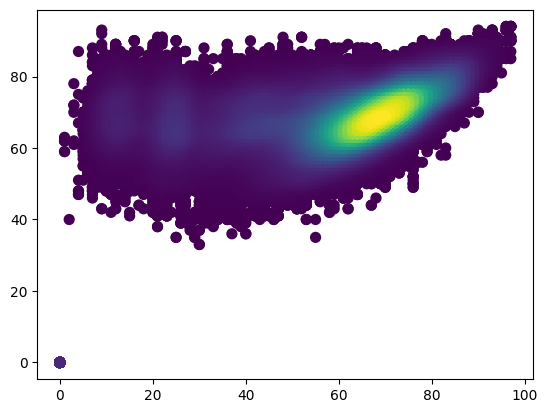

In [38]:
# To visualize we can plot the overall rating against different attributes
# (here dribbling) and see that the linear assumption is not great.

# Density plot (takes a few minutes to run with such a large data set)

x=data["dribbling"]
y=data["overall_rating"]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = pyplot.subplots()
ax.scatter(x, y, c=z, s=50)
pyplot.show()
